In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from xgboost import XGBRegressor 

# Load data
train_data = pd.read_csv('main_dataset.csv')
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

# Features and target
X = train_data[['Tox', 'Nd', 'Ns', 'Vds', 'Vgs']]  # ignoring Nc
y = train_data['Log_Id']

# Calculate sample weights
# Assign higher weights to high current values
weights = np.where(train_data['Id'] > 1e-6, 10, 1)  # Adjust weights as needed

# Polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train-test split
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X_scaled, y, weights, test_size=0.3, random_state=42)

# XGBoost model with sample weights
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train, sample_weight=weights_train)

# Predictions
y_pred_1 = model.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred_1))
print("MAE:", mean_absolute_error(y_test, y_pred_1))
# print("RMSE:", root_mean_squared_error((y_test, y_pred_1)))


R^2 Score: 0.9965118095055473
MAE: 0.16717078686180112


In [3]:
# testing the model on the test data set 
#  importing the testt data
test_data = pd.read_csv('test_data.csv')


In [4]:
print(test_data[test_data['Vgs'] == 2].index.tolist())
test_data = test_data.iloc[0:202]
print(test_data)

[202, 405, 608, 811, 1014]
     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000   
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000   
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733   
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951   
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951   
..   ...  ...           ...           ...           ...  ...       ...   
197   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.952951   
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951   
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951   
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951   
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.992951   

               Id  
0    2.330000e-18  
1    4.340000e-18  
2    1.130000e-18  
3   

In [5]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

In [6]:
X_test_1 = test_data[['Tox', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [7]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

0.991652365123301


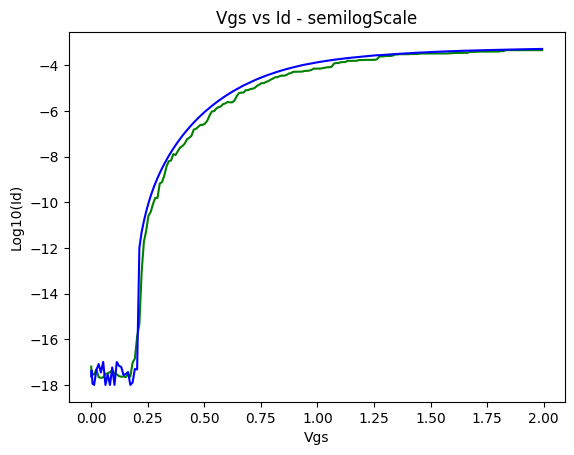

In [8]:
# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.show()


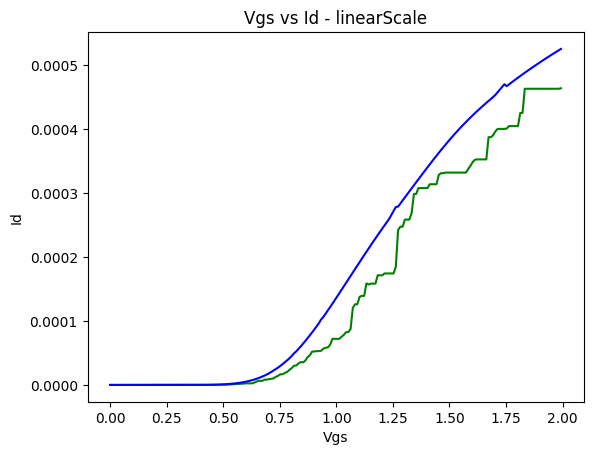

In [9]:
#plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.show()

In [10]:
print(10**y_test_1)


0      2.330000e-18
1      4.340000e-18
2      1.130000e-18
3      1.000000e-18
4      4.520000e-18
           ...     
197    5.169600e-04
198    5.191940e-04
199    5.214020e-04
200    5.235830e-04
201    5.257440e-04
Name: Log_Id, Length: 202, dtype: float64


[202, 405, 608, 811, 1014]
0.9787765811261676


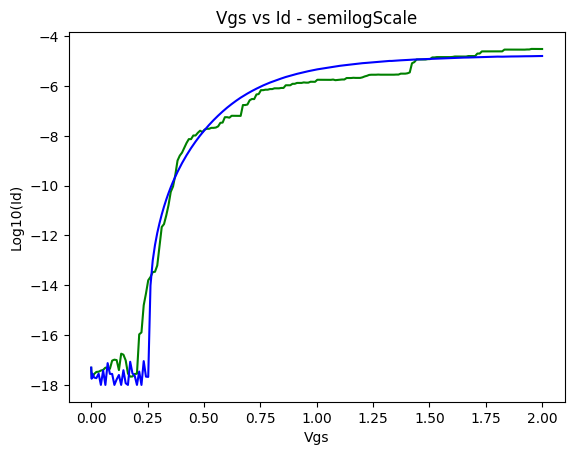

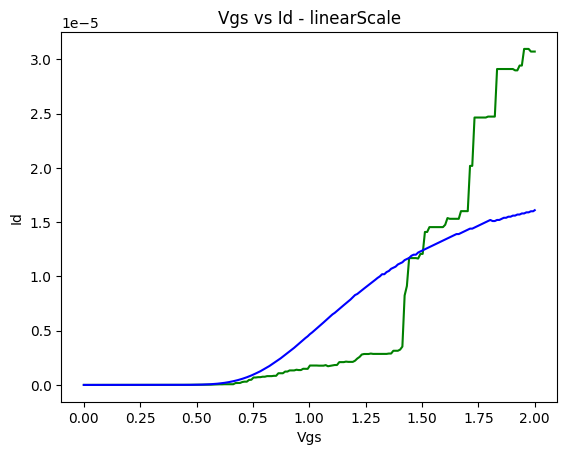

In [13]:
test_data = pd.read_csv('test_data.csv')
print(test_data[test_data['Vgs'] == 2].index.tolist())
test_data = test_data.iloc[203:406]

test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[['Tox', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.show()
#plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.show()

[202, 405, 608, 811, 1014]
0.9867127124996358


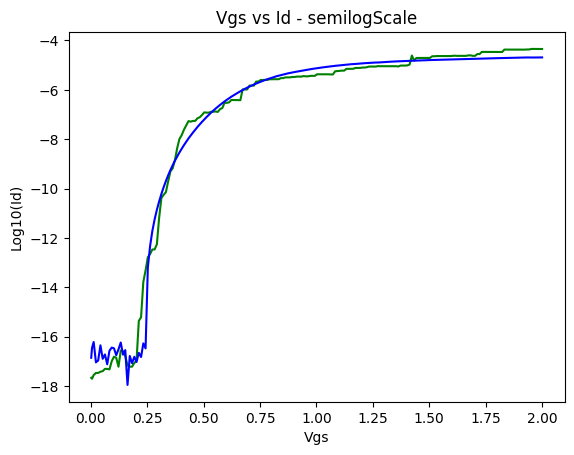

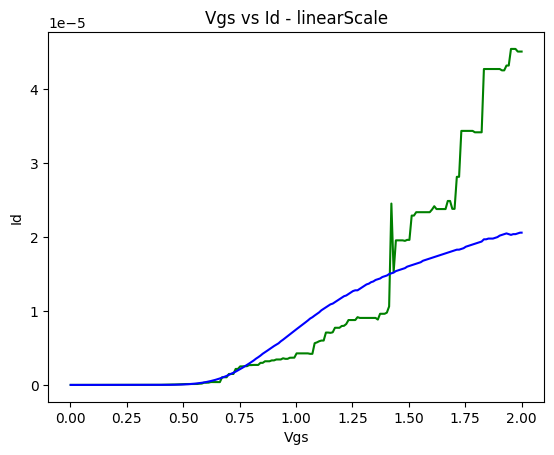

In [14]:
test_data = pd.read_csv('test_data.csv')
print(test_data[test_data['Vgs'] == 2].index.tolist())
test_data = test_data.iloc[407:609]

test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[['Tox', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.show()
#plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.show()

[202, 405, 608, 811, 1014]
0.9936119601686562


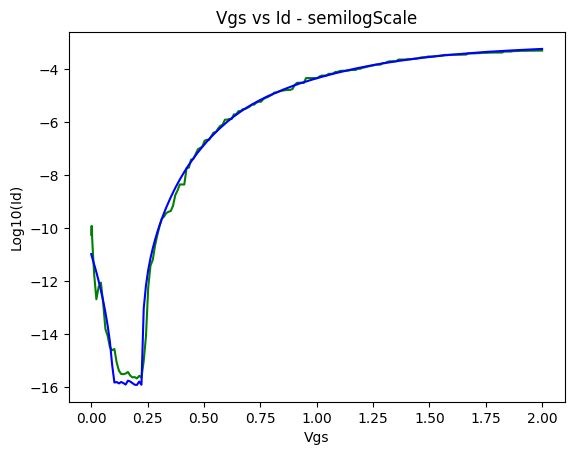

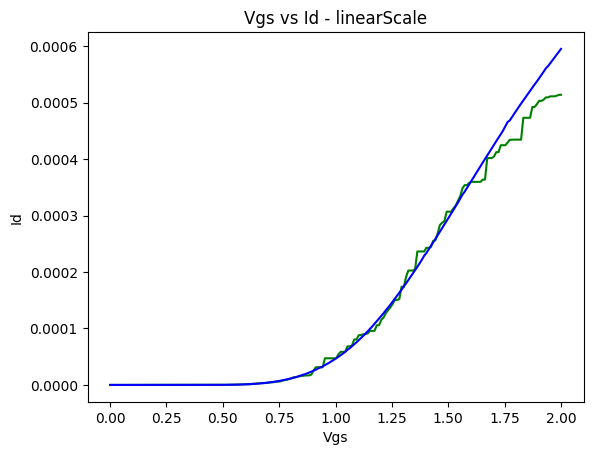

In [15]:
test_data = pd.read_csv('test_data.csv')
print(test_data[test_data['Vgs'] == 2].index.tolist())
test_data = test_data.iloc[812:1015]

test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[['Tox', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

# plotting the data 
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.show()
#plotting the data 
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.show()